# Analytical calculation of gravity potential field generated by a spherical shell with arbitrary variable density in the radial coordinate

We are going to calculate the potential generated by a spherical shell with internal and external radii $R_1$ and $R_2$, respectivetly, and a variable density function that depends on the radial coordinate $r'$:

\begin{equation}
\rho \equiv \rho(r').
\end{equation}

Let's calculate the potential $V$ generated by the spherical shell on an arbitrary point of the z axis (at a distance $r$ from the origin) that falls outside of it ($r>R_2$).

\begin{equation}
V(r) = G \int\limits_0^{2\pi} \int\limits_{-\pi/2}^{\pi/2} \int\limits_{R_1}^{R_2} \frac{\rho(r')}{l} {r'}^2 \cos\phi' \,\, \text{d}r' \text{d}\phi' \text{d}\lambda'
\end{equation}
where
\begin{equation}
l = \sqrt{{r'}^2 + r^2 - 2r'r \cos\Psi} \, , \quad \cos\Psi = \sin\phi \sin\phi' + \cos\phi \cos\phi' \cos(\lambda' - \lambda)
\end{equation}

If the computation point is located on the $z$ axis and at a distance $r$ from the origin, its coordinates wil be: $(x, y, z) = (0, 0, r > R_{2})$. In spherical coordinates they translate into $(r, \phi, \lambda) = (r > R_{2}, \pi/2, 0)$. So the previous equations can be written as follows.

\begin{equation}
\cos\Psi = \sin\phi' \, , \quad l = \sqrt{r'^2 - 2 r' r \sin\phi' + r^2}
\end{equation}

Due to symmetry, the integration in the $\lambda'$ is straightforward:

\begin{equation}
V(r) = 2\pi G \int\limits_{-\pi/2}^{\pi/2} \int\limits_{R_1}^{R_2} \frac{\rho(r')}{\sqrt{r'^2 - 2 r' r \sin\phi' + r^2}} {r'}^2 \cos\phi' \,\, \text{d}r' \text{d}\phi'
\end{equation}

Now, the integration on $phi'$ can be performed independently of the definition of function $\rho(r')$. We are going to solve it analytically using SymPy:

** Import packages and initialize SymPy session **

In [1]:
from sympy import symbols, Function, pi, sqrt, cos, sin, exp
from sympy import init_printing

init_printing() # cells' ouput as LaTeX expressions

** Definition of symbols **

In [2]:
r = symbols("r", real=True, positive=True)
rp = symbols("r'", real=True, positive=True)
phi = symbols("phi", real=True)
G, R1, R2 = symbols("G R_1 R_2", real=True, positive=True)

rho = Function("rho")

** Definition of the integrand **

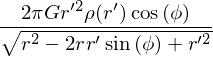

In [3]:
integrand = 2*pi*G*rho(rp)*rp**2*cos(phi)/sqrt(r**2 + rp**2 - 2*r*rp*sin(phi))
integrand

** Integration on $\phi$ **

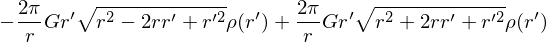

In [4]:
integrand = integrand.integrate((phi, -pi/2, pi/2))
integrand

If we assume that the computation point is outside of the outer radius $R_2$, i.e. $r > r'$, then the square roots gets simplified:

\begin{equation}
\sqrt{r^{2} - 2 r r' + r'^{2}} = |r - r'| = r - r', \quad
\sqrt{r^{2} + 2 r r' + r'^{2}} = |r + r'| = r + r'.
\end{equation}

In [5]:
# Replace the square roots with the corresponding expression
integrand = integrand.replace(sqrt(r**2 - 2*r*rp + rp**2), r - rp)
integrand = integrand.replace(sqrt(r**2 + 2*r*rp + rp**2), r + rp)
integrand = integrand.simplify()

** Expression of the potential as integral in $r'$**

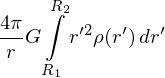

In [6]:
integrand.integrate((rp, R1, R2))

## Linear density

If the density $\rho(r')$ is a linear function:

\begin{equation}
    \rho(r') = a r' + b
\end{equation}

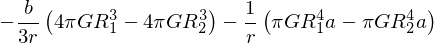

In [7]:
a, b = symbols("a b", real=True)
rho_lineal = a*rp + b

integrand.replace(rho(rp), rho_lineal).integrate((rp, R1, R2)).apart(a).apart(b)

So the potential generated by a linear density can be written as follows:

\begin{equation}
    V_\text{lin} = \pi G 
        \left( a \frac{R_2^4 - R_1^4}{r} +
        b \frac{4}{3} \frac{R_2^3 - R_1^3}{r} \right)
\end{equation}

## Exponential density

If the density $\rho(r')$ is an exponential function:

\begin{equation}
    \rho(r') = A e^{-(r' - \Delta h)/b}
\end{equation}

In [8]:
A = symbols("A", real=True)
b, deltah = symbols("b Delta_h", real=True, positive=True)
rho_exponential = A*exp(-(rp - deltah)/b)

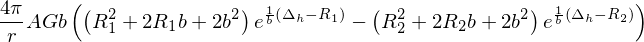

In [9]:
integrand.replace(rho(rp), rho_exponential).integrate((rp, R1, R2)).simplify()

So the potential generated by an exponential density can be written as follows:

\begin{equation}
    V_\text{exp} = \frac{4\pi G}{r} A b \left[
        \left( R_1^2 + 2 R_1 b + 2 b^2 \right) e^{-(R_1 - \Delta h)/b} -
        \left( R_2^2 + 2 R_2 b + 2 b^2 \right) e^{-(R_2 - \Delta h)/b}
        \right]
\end{equation}